***

<div id = "part1">
    <h1>
        Part 1: Data Preparation & Loading Packages
    </h1>
</div>

In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import packages for ResNet and models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import resnet50, ResNet50
from sklearn import linear_model
from sklearn import ensemble
from sklearn import neural_network
import os
import numpy as np
import cv2


# Import package for train-test split
import splitfolders


# Import package for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

2024-08-22 14:29:03.176245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 14:29:03.176377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 14:29:03.331637: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


***

<div id = "part2">
    <h1>
        Part 2: ResNet Model
    </h1>
</div>


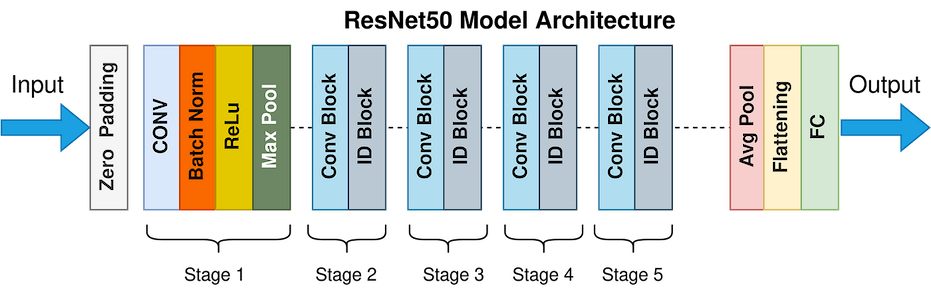

Image Credit [WikiMedia Commons](https://commons.wikimedia.org/wiki/File:ResNet50.png)

There are various operations that happen in each layer of the residual network. To have a deeper understanding of how the operations that happen in each layer of ResNet, consider reading [Pablo Ruiz's](https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8) blog published on [towardsdatascience.com](https://towardsdatascience.com/).





***

<div id = "part2.1">
    <h1>
        Example Of Transforming Image Input From 3 Dimensional Data To 1 Dimension In ResNet
    </h1>
</div>



In [3]:
# Create a ResNet Model
res_model = ResNet50(weights = "imagenet", input_shape = (150, 150, 3), include_top = False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Load sample image and resize to desired dimensions
# In this case, 150px by 150px
img = cv2.imread("/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (1).jpg")
img = cv2.resize(img, (150, 150))

In [5]:
# Convert sample image to array using Numpy
img = image.img_to_array(img)
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [6]:
# Preprocess the Numpy array encoding of sample image through ResNet, then
# Make a prediction using ResNet
img = resnet50.preprocess_input(np.expand_dims(img.copy(), axis = 0))
img = res_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [7]:
# Initially, the sample image is made of a 3-dimension matrix
img.shape

# (1, 5, 5, 2048)

(1, 5, 5, 2048)

In [8]:
# Flatten image to 1 dimension
img = img.flatten()
img.shape

# (51200,)

(51200,)

***

<div id = "part2.2">
    <h1>
        Part 2.2: Embedding & Flattening Of Trainset & Testset Data
    </h1>
</div>

We will now apply the steps from **Part 2.1** across the entire dataset.

Using [split-folders](https://pypi.org/project/split-folders/) library, we will separate the dataset into a **trainset** and **testset**. We will then use the [os.listdir()](https://www.geeksforgeeks.org/python-os-listdir-method/) and [os.path.join](https://www.geeksforgeeks.org/python-os-path-join-method/) methods to create file paths for the original image, and its predicted output from ResNet.

Lastly, we will feed each image through ResNet to attain a prediction. ResNet predictions will be stored in x-lists (x_train, x_test), while the original image will be stored in y-lists (y_train, y_test).

In [9]:
# Create train-val-test split (70-10-20 split), and create a output directory
input_folder = "/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
output = "/kaggle/working/"
splitfolders.ratio(input_folder, output = output, seed = 42, ratio = (.7, .1, .2))

Copying files: 12446 files [02:17, 90.66 files/s] 


In [ ]:
# Embed every file in the train set


# Set trainset and testset directory
train = "/kaggle/working/train"
test = "/kaggle/working/test"


# Create an empty list to store flattened image array encoding that we will pass through ResNet
x_train = []
y_train = []


# For every image in the trainset, we want to perform the following tasks:
# 1. Resize image to appropriate dimensions
# 2. Convert image to an array using Numpy
# 3. Preprocess the Numpy array encoding of each image through ResNet
# 4. Run each image through ResNet to make a prediction
# 5. Flatten each prediction into 1 dimension
# 6. Append the ResNet predicted images into x_train
# 7. Append original image into y_train
for i in os.listdir(train):
    for j in os.listdir(os.path.join(train, i)):
        img = cv2.imread(os.path.join(train, i, j))
        img = cv2.resize(img, (150, 150))
        img = image.img_to_array(img)
        img = resnet50.preprocess_input(np.expand_dims(img.copy(), axis = 0))
        img = res_model.predict(img)
        img = img.flatten()
        x_train.append(img)
        y_train.append(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━

***

<div id = "part3">
    <h1>
         Applying ResNet Output To ML Models
    </h1>
</div>



In [14]:
# Using Random Forest
rf_model = ensemble.RandomForestClassifier()
rf_model.fit(x_train, y_train)
pred = rf_model.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test, pred))

[[ 743    0    0    0]
 [   0 1017    0    0]
 [   2    9  265    1]
 [   0    3    0  454]]
0.9939855653568564


In [ ]:
# Using Neural Network
nn_model = neural_network.MLPClassifier()
nn_model.fit(x_train, y_train)
pred = nn_model.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test, pred))


* ResNet + Random Forest     = 0.9952
* ResNet + Neural Network    = 0.9992

Both ML models boast extremely high accuracy scores, however **ResNet + Neural Network** achieved the highest accuracy of **0.9992**.

